<a href="https://colab.research.google.com/github/augnoel/noel/blob/develop/standardA_clustering_ans5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##0. 패키지 호출

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1. DBSCAN 실습

In [ ]:
data_circle, data_circle_label = datasets.make_circles(n_samples=300, noise=0.01, random_state=0)

In [ ]:
print(data_circle[:5])
print("-----------")
print(data_circle_label[:5])

[[-0.59432969  0.51193717]
 [-0.02822862  0.79544635]
 [ 0.87132636  0.50104899]
 [-0.77930262  0.13429051]
 [-0.67859135 -0.43426961]]
-----------
[1 1 0 1 1]


In [ ]:
import plotly.graph_objs as go

def scatter_plot_2d_with_label(dataset, labels, title = "2D Scatter Plot"):
  fig = go.Figure()
  for label in set(labels):
      # 해당 label에 해당하는 데이터만 추출
      x_data = dataset[labels == label, 0]
      y_data = dataset[labels == label, 1]

      # scatter plot에 추가
      fig.add_trace(go.Scatter(
          x=x_data,
          y=y_data,
          mode='markers',
          marker=dict(
              size=10,
              opacity=0.7,
              line=dict(width=0.5, color='black')
          ),
          name=f'Label {label}'
      ))

  # 그래프 레이아웃 설정
  fig.update_layout(
      title=title,
      xaxis=dict(title='X'),
      yaxis=dict(title='Y'),
      showlegend=True,
      autosize=False,
      width=800,
      height=600,
  )

  # 그래프 출력
  fig.show()

scatter_plot_2d_with_label(data_circle, data_circle_label)

In [ ]:
#DBSCAN을 통한 클러스터링
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
dbscan = DBSCAN(eps=0.1, min_samples=4).fit(data_circle)
y_pred = dbscan.labels_

In [ ]:
scatter_plot_2d_with_label(data_circle, y_pred, title = "DBSCAN Result")

In [ ]:
#K-means와 결과 비교하기
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(data_circle)
y_pred_kmeans = kmeans.labels_

scatter_plot_2d_with_label(data_circle, y_pred_kmeans, title = "Kmeans Result")

## 2. NearestNeighbors를 활용한 적정 eps 값 찾기

In [ ]:
from sklearn.neighbors import NearestNeighbors
#https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors.kneighbors
neighbors = NearestNeighbors(n_neighbors=4).fit(data_circle) #minPts 값을 K로 설정
distances, indices = neighbors.kneighbors(data_circle)

In [ ]:
distances = np.sort(distances, axis=0)[:,-1] #k번째 이웃과의 거리를 가져옴
distances[:3]

array([0.038327  , 0.04109797, 0.0426139 ])

<Axes: >

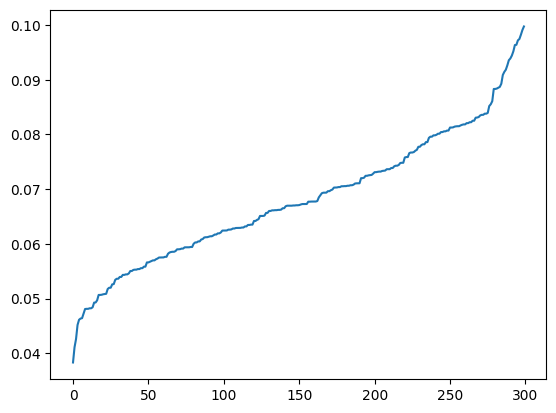

In [ ]:
sns.lineplot(distances)